# Module 3 - Asset Movement - Non-Technical Document

## Andrew Cole & Will Herzog

Our main objective was to provide a prospective stakeholder with insights driven from statistical hypothesis testing on gathered data. Our perspective stakeholder is a young professional who is looking to begin a financial investment portfolio and is unaware of a good place to begin.

In order to provide insights, we decided to look at the performance of a particular mutual fund's performance relative to its benchmark index fund. Mutual funds provide investors with diversified access to a variety of equities at a relatively low cost. The XLV healthcare mutual fund (ticker symbol: XLV) was selected due to it's strong performance history as well as it's heavy weight relative to it's benchmark index, the S&P 500 (ticker symbol: INX).

In order to prove why the XLV is a good starting point, we constructed our hypothesis around the foudnational idea that a heavy weighted mutual fund would trend along with it's benchmark fund. The INX index returns on average around 8%, a return average higher than most other asset classes, so we would like to provide insights as to just how closely the sample mutual fund (XLV) tracks its benchmark fund (INX).

These insights were then gathered and used to inform the stakeholder as to why the XLV was, in fact, a sound investment choice to be

In [18]:
# Here we are importing the necessary Python libraries which we will use to gather necessary data, perform operations & hypothesis testing, 
# as well as visualizations
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math 
from statsmodels.stats.power import zt_ind_solve_power
import asset_cleaner
import test_statistics
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Gathering & Organizing Data - XLV & S&P 500 


The first thing we will do is gather the necessary economic data on both the XLV and INX funds. Data was collected from the alphavantage.co API. Data for the XLV and INX indices dates back to December 1999 and January 2000, respectively. Now that we have the relevant information for the XLV fund in a dataframe, we will perform operations on the dataframe in order to run our hypothesis testing on. In this case, we create the column "day_pct_change" which represents the daily change in price as a percentage.


In [19]:
# We are using the asset_cleaner module in order to gather the XLV API data and transform it into a dataframe with operable columns. 
# This is the basis for all operations completed on XLV data. 
xlv_symbol = 'XLV'
xlv_df = asset_cleaner.clean_asset_data(xlv_symbol)
xlv_df.head()

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-13,100.85,101.47,100.480,100.55,2932027.0,-0.297471,238.666218
1,2019-12-12,100.07,101.28,100.020,100.95,9769053.0,0.879384,240.013473
2,2019-12-11,100.01,100.27,99.820,100.02,6010787.0,0.009999,236.881105
3,2019-12-10,99.69,100.02,99.295,99.93,6027927.0,0.240746,236.577972
4,2019-12-09,100.45,100.47,99.710,99.71,5148857.0,-0.736685,235.836982


We will now repeat this process for the S&P 500 index (INX).

In [20]:
sp_symbol = 'INX'
sp_df = asset_cleaner.clean_asset_data(sp_symbol)
sp_df.head()

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-13,3166.6499,3182.6799,3157.8501,3159.8701,6.970563e+08,-0.214100,115.066878
1,2019-12-12,3141.2300,3176.2800,3138.4700,3168.5701,3.990690e+09,0.870363,115.659017
2,2019-12-11,3135.7500,3143.9800,3133.2100,3141.6299,3.252540e+09,0.187512,113.825414
3,2019-12-10,3135.3601,3142.1201,3126.0901,3132.5200,3.343790e+09,-0.090583,113.205377
4,2019-12-09,3141.8601,3148.8701,3135.4600,3135.9600,3.345990e+09,-0.187790,113.439510


## Hypothesis Testing: XLV & S&P 500

Now that all of our necessary data is gathered and average daily percent change is calculated for each of the indices, we will develop our hypothesis for testing. The XLV contains approximately 10% of the equities which make up the overall benchmark INX. Due to this weighting, one would expect for the average movements to trend in general accoreance with each other. These tests will determine just how much they trend together. 

Null Hypothesis: The daily avg. percent change in the XLV index fund **is not different** to that of the overall S&P 500

Alternative Hypothesis: The daily avg. percebt change in the XLV index fund **is different** than that of the overall S&P 500

In [21]:
# We are taking 5000 random samples of 50 different daily percent movements
# of both XLV and INX daily percent changes, respectively. These average percent movements will then 
# be used to visualize the overall mean movement of each of the indices.

xlv_avg_percent_moves = []
sp_avg_percent_moves = []

for i in range(5000):
    
    sample_xlv = xlv_df.sample(n = 50, random_state = i)
    xlv_avg_percent_moves.append(sample_xlv.day_pct_change.mean())
    
    sample_sp = sp_df.sample(n = 50, random_state = i)
    sp_avg_percent_moves.append(sample_sp.day_pct_change.mean())

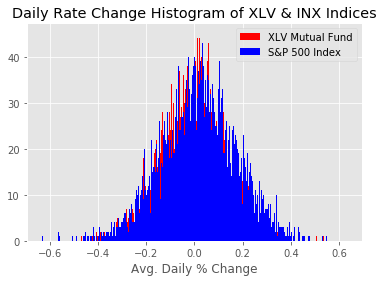

In [22]:
# We are visualizing the histogram of both the XLV and INX indices on top of each other. 
# The y-axis represents the frequency of a mean ocurring, and the x-axis represents the daily
# average percent movement.

plt.style.use('ggplot')
plt.hist(xlv_avg_percent_moves, bins = 500, color = 'red', label = 'XLV Mutual Fund');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500 Index');
plt.xlabel('Avg. Daily % Change');
plt.title('Daily Rate Change Histogram of XLV & INX Indices');
plt.legend();

The above graph shows us that there is etreme similarities in average daily percent change between both the INX and XLV indices. To quantify just how similar these two indices are in movement, we will conduct a series of statistical tests.

The first statistic which we will obtain is a Z-stat. This Z-stat will tell us within how many standard deviations from the overall mean each of these indices is. Becuase the z-stat is so low, as shown below, we can be almost certain that the mean daily changes of each index are not different.

In [23]:
# Here we are using a function which is contained in another module, test_statistics.py, 
# and imported for operation. The test calculates the Z-stat, P-value, and Standard Error,

test_statistics.calculate_test_stats(sp_avg_percent_moves, sp_avg_percent_moves)

 Z-stat; 0.0 
 P-Value: 0.5 
 Standard Error: 0.0022410035177593108


The other two statistics, the P-value and Standard Error, further help reinforce our notions that there is no difference in means between the XVL and INX. The p-value represents the likelihood that the mean of the benchmark population (INX) is significantly different from that of the sample (XLV). A p-value of 0.05 would represent significant difference. Therefore, with a p-value of 0.5, we can confidently conclude that we fail to reject the null hypothesis. Furthermore, the standard error of the sample XLV, which represents the how spread out the sample XLV's data is compared to the INX benchmark data, is signfiicantly small. Further reinforcing our hypothesis result.

## Gathering & Organizing Data - Johnson & Johnson 


We have seen that the XLV closely trends with the INX in part due to the extremely close average daily price change of the two indices. As stated before, the XLV is one of the heaviest weighted funds within the S&P 500. Looking inwards, the larget componoent of the XLV fund is the Johnson & Johnson equity (JNJ). JNJ is the 9th heaviest weighted equity within the overall INX, so with the above knowledge we can presume that the weighting of the JNJ equity will result in close trending with the XLV and benchmark INX fund. We will repeat the data gathering and hypothesis testing for JNJ in relation to it's overall benchnmark INX.

In [25]:
# Loading and gathering data for JNJ into operable dataframe as done before for XLV/INX
jj_symbol = 'JNJ'
jj_df = asset_cleaner.clean_asset_data(jj_symbol)
jj_df.head()

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-13,141.10,141.80,140.3100,140.355,1346032.0,-0.527994,48.319772
1,2019-12-12,141.32,142.06,140.7300,141.340,5011366.0,0.014152,49.360668
2,2019-12-11,140.93,141.98,140.6300,140.980,6498780.0,0.035479,48.980239
3,2019-12-10,140.80,141.00,139.9100,139.990,5310334.0,-0.575284,47.934059
4,2019-12-09,140.39,140.81,140.0601,140.500,4240984.0,0.078353,48.473000


## Hypothesis Testing: JNJ & INX

We will now conduct the same hypothesis testing for the JNJ sample against the INX index. 

Null Hypothesis: The daily avg. percent change in the JNJ index fund **is not different** to that of the overall S&P 500

Alternative Hypothesis: The daily avg. percent change in the JNJ index fund **is different** than that of the overall S&P 500

In [28]:
# We are taking 5000 random samples of 50 different daily percent movements
# of both JNJ and INX daily percent changes, respectively. These average percent movements will then 
# be used to visualize the overall mean movement of each of the indices.
jj_avg_percent_moves = []

for i in range(5000):
    
    sample_jj = jj_df.sample(n = 50, random_state = i)
    jj_avg_percent_moves.append(sample_jj.day_pct_change.mean())

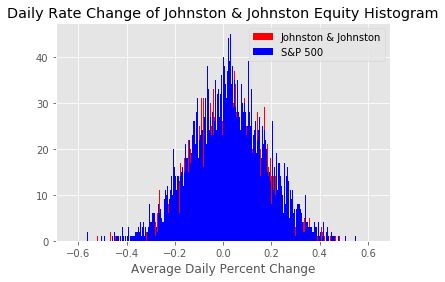

In [34]:
# We are visualizing the histogram of both the JNJ and INX indices on top of each other. 
# The y-axis represents the frequency of a mean ocurring, and the x-axis represents the daily
# average percent movement.

plt.style.use('ggplot')
plt.hist(jj_avg_percent_moves, bins = 500, color = 'red', label = 'Johnston & Johnston');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500');
plt.xlabel('Average Daily Percent Change')
plt.title('Daily Rate Change of Johnston & Johnston Equity Histogram')
# plt.hist(xlv_avg_percent_moves, bins = 500, color = 'pink', label = 'XLV');
plt.legend();  

The above graph once again shows the extreme similarities between the mean daily percent change of JNJ & INX indices. To confirm our findings and reject the null hypothesis, we will again conduct the z-test and obtain the p-value and standard error for statistical evidence.

In [35]:
# Here we are using a function which is contained in another module, test_statistics.py, 
# and imported for operation. The test calculates the Z-stat, P-value, and Standard Error,
test_statistics.calculate_test_stats(jj_avg_percent_moves, sp_avg_percent_moves)

 Z-stat; -0.0 
 P-Value: 0.5 
 Standard Error: 0.0022410035177593108


Once again, the test statistics allow us to confidently fail to reject the null hypothesis that the JNJ & INX mean daily percent changes are **not different**. 

## Gathered Insights

Upon these findings, we can now take our statistical insights back to our stakeholder. From foundational investment practices, because our stakeholder would like to begin an investment portfolio, diversification of assets with aims of successful long term returns is essential when beginning a portfolio. Due to the XLV healthcare fund's sheer size and trending with it's benchmark INX (which returns an avg. annual return of 8%), we can recommend to the stakeholder that it is in fact a very solid mutual fund to begin their portfolio with. Furthermore, with portfolio diversification in mind, we can also recommend the JNJ equity for similar weighting & trending principles to it's benchmark S&P 500 index. 